> **University of Pisa** \
> **M.Sc. Computer Science, Artificial Intelligence** \
> **Continual learning 2022/23** \
> **Authors**
* Andrea Iommi - a.iommi2@studenti.unipi.it

# Memory Replay GANs
# Learning to generate images from new categories without forgetting
#### [(original paper)](https://proceedings.neurips.cc/paper/2018/hash/a57e8915461b83adefb011530b711704-Abstract.html)
### Notebooks
*   **Classical acGAN in offline settings**
*   Classical acGAN in online settings
*   acGAN with join retrain
*   acGAN with replay alignment


### 1) Introduction and problem settings

The aim of this small project is to have a deal with some Continual learning (CL) methods in the Axuliarity Conditional Adversarial Networks (acGAN).
Typically, in a standard setting, we train a network passing the whole dataset at the same time, but this kind of approach is not always possible: maybe all classes in the database are not available at the same time, the dataset is extremely large and cannot suit in RAM or the environment provide us one class per time and for privacy setting the data cannot be stored and so on.

The CL methods implemented give us a solution. More exactly, we explored the **join retrain** (family of rehearsal methods) and the **replay alignment** (family of regularization methods).
The first one exploits a buffer to avoid that the network forgets the previous information acquired. The peculiarity is that the buffer is non composed by the input taken from the previous experiences (in this case we are talking of images) but are self generated by the network before starting the next experience.
Regarding the second method, it adopts a more implicit mechanism. It adds the "alignment" loss that aims to keep the output of the network in the previous experience equal to the output of the network in the current one.


### 2) Tools

All implementations are preformed from scratch in pytorch. The theory and details of the methods presented can be found in the original papaer (liked above).

###  3) Model selection and hyperparameter

We tried different configurations of hyperparameter in order to choose the best ones. In particular:

#### Hyperparameter for general acGAN


|:-----------:	|:------------------:	|-------------------------------------------------------------------------------------------------------------	|
| num_classes 	|         10         	|                                                                                                             	|
|   img_size  	|         32         	|                                                                                                             	|
|   channels  	|          1         	|                                                                                                             	|
|   n_epochs  	|    30/50/**100**   	| Under 30 there was under-fitting, and with 100 we obtained good results                                     	|
|  batch_size 	|      **32**/64     	| The original paper suggests 64, but with some experiments 32 seems more suitable                            	|
|  embeddings 	|   **100**/150/200  	| The results were very similarity, we think that is not so much crucial for this kind of purpose             	|
|      lr     	| **7e-5**/1e-4/1e-3 	| (Also in this way the original paper suggests 1e-4 but since we've shrunk the batch_size, we reduced the lr 	|


In [2]:
import torch
from Trainer import Trainer
from Utils import custom_mnist
from Plot_functions import generate_classes, plot_history

In [3]:
config = dict(
    device="cuda" if torch.cuda.is_available() else "cpu",
    num_classes=10,
    img_size=32,
    channels=1,
    n_epochs=[100],
    batch_size=32,
    embedding=100, # latent dimension of embedding
    lr_g=7e-5, # Learning rate for generator 7e-5
    lr_d=7e-5 # Learning rate for discriminator
    )

## Classical acGAN in offline settings (training)
As a first step, we create a classical acGAN in offline setting, where all digits are learned at the same time.
In this setting, we have only one experience that contains all digits.

In [ ]:
experiences = [[0,1,2,3,4,5,6,7,8,9]] # list of experiences
exp_generator = custom_mnist(experiences = experiences)
trainer = Trainer(config=config)
history = trainer.fit_classic(experiences=exp_generator)
# we removed all training logs

## Loss functions and Accuracy

The charts below represent the *loss function* for both Generator and Discriminator. Since the GAN architecture is based on Min-Max optimization, the loss functions are not smooth but irregular. Generally, finding an optimal parametrization is really hard for this kind of architecture.

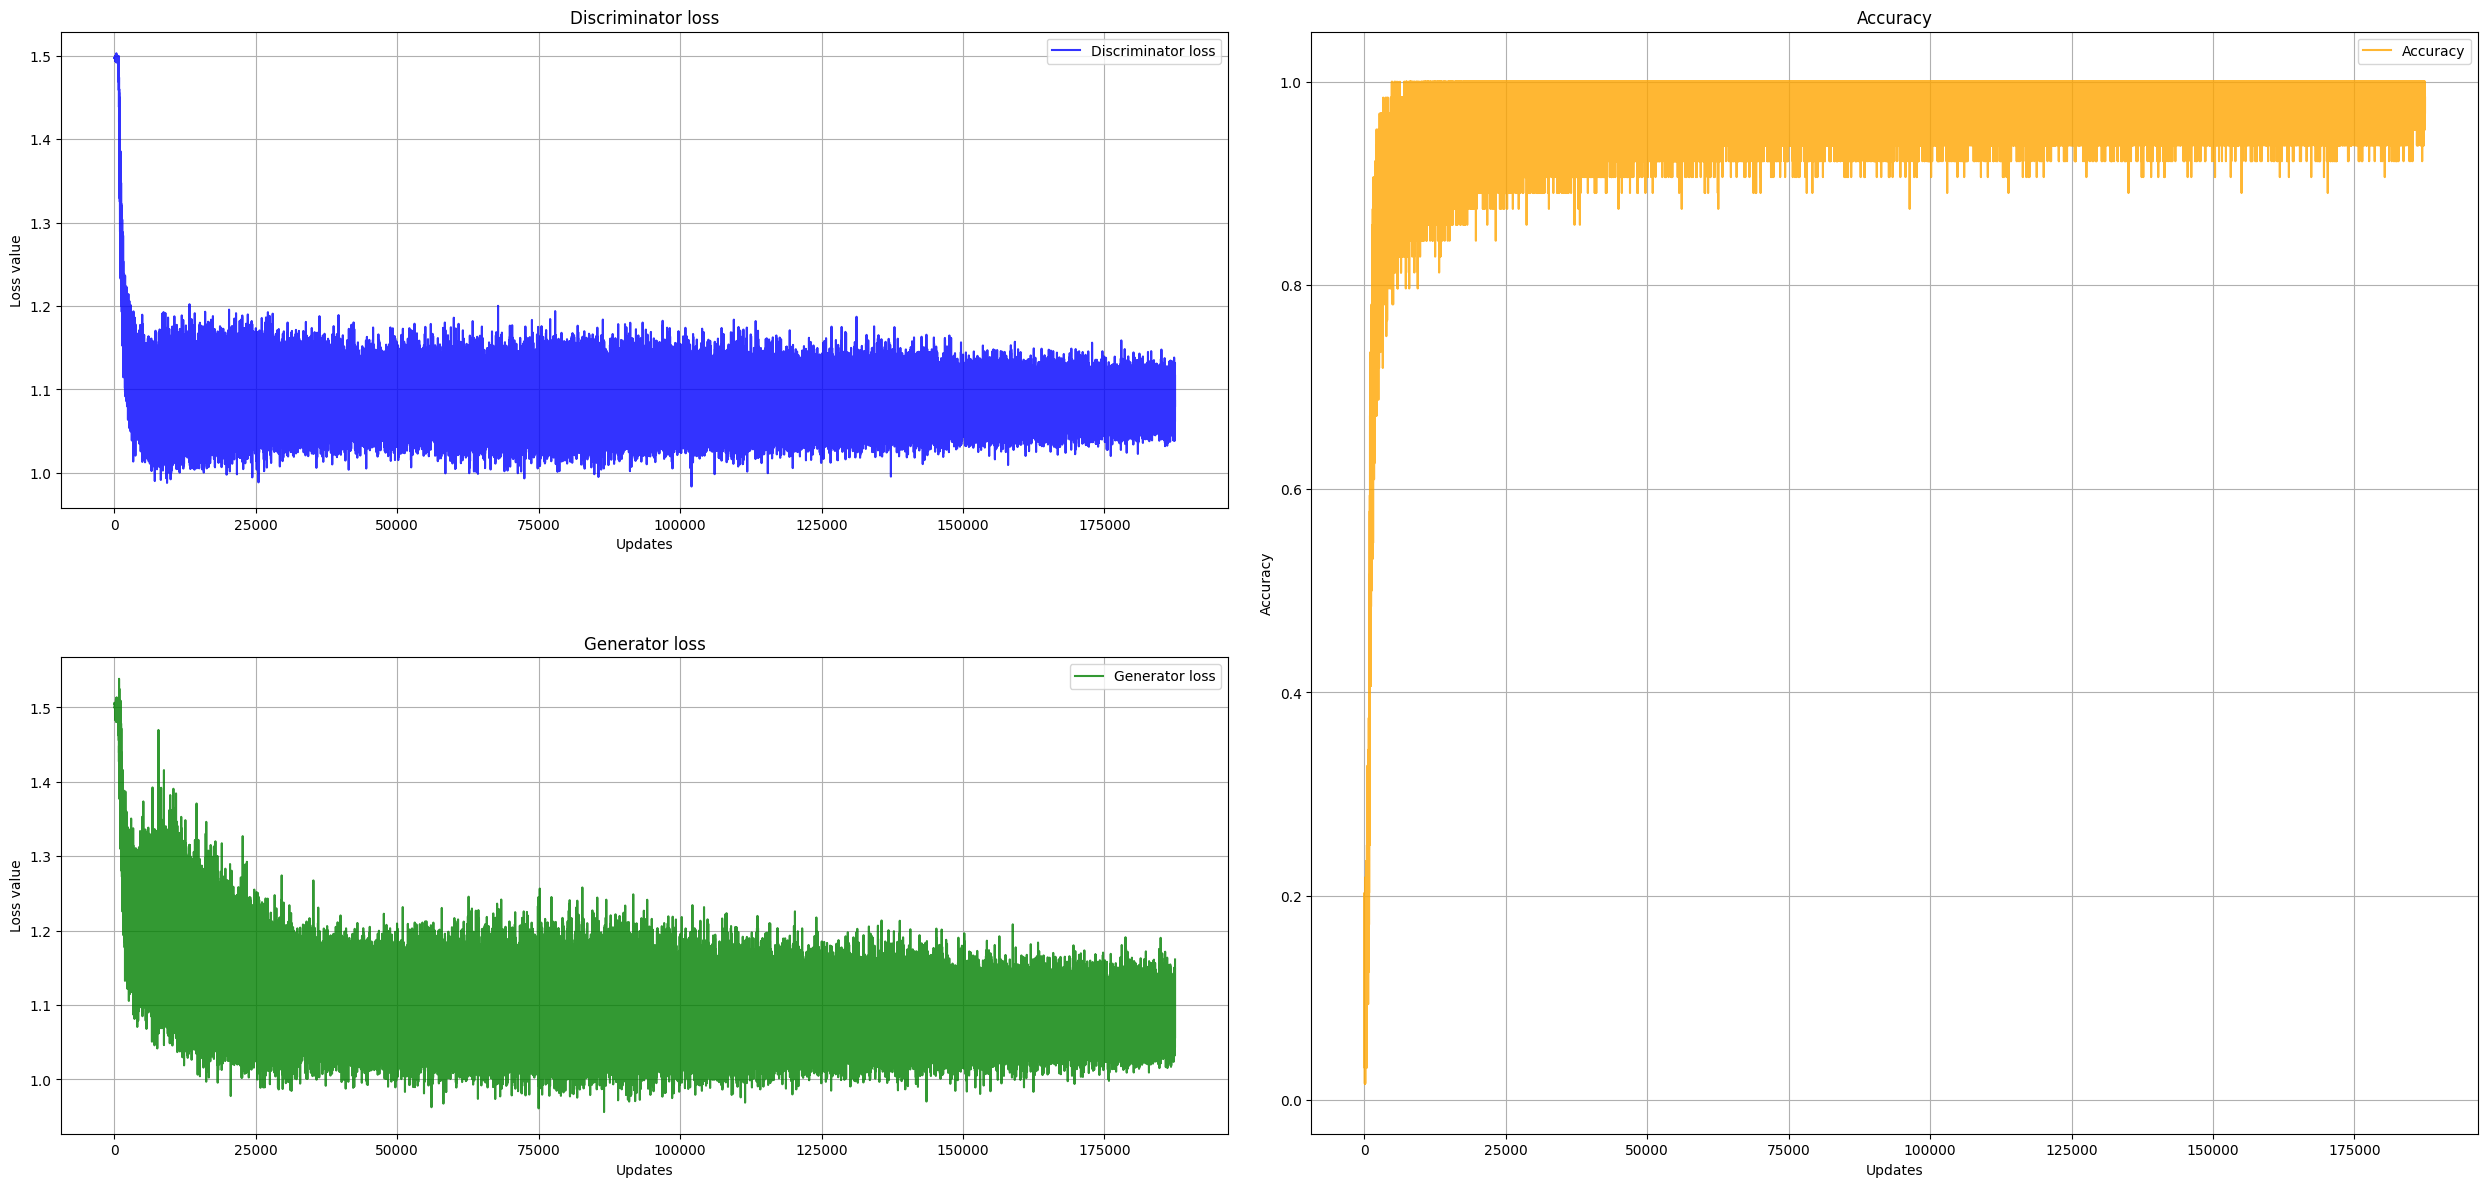

In [5]:
plot_history(history)

## Evaluate the architecture

As we can see, the model is able to generate quite well all digits.
In the following figure, we have an example of results. We identify *t* as a conditional input and *gen* as the number of examples to generate. Each digit has a distinct random noise-input to ensure different output.

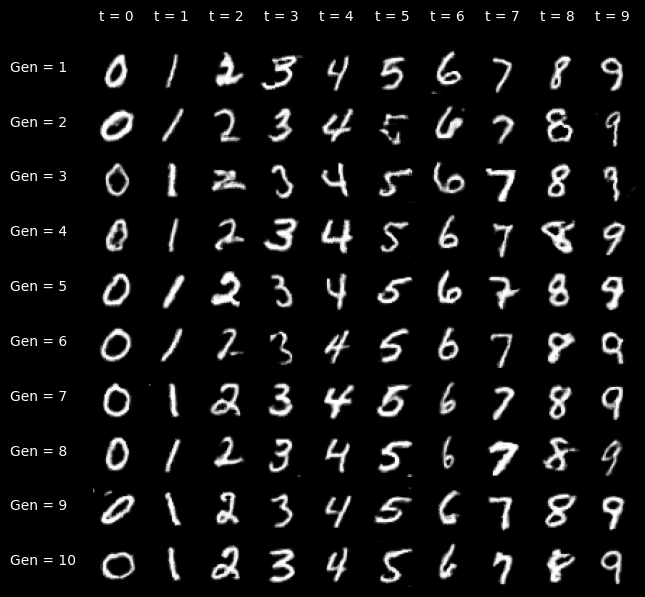

In [6]:
generate_classes(trainer.generator, config["num_classes"], rows=10, device=config["device"])

## Final comment
With this notebook, we want to just show how the basically acGAN works in a classical setting.